<a href="https://colab.research.google.com/github/Blackcipher101/ASL-detector/blob/main/terrainOCR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir .kaggle

In [2]:
import json
token = {"username":"nehalnevle","key":"f56fbefc794d7437f2952910cd1d058d"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [3]:
!mkdir /root/.kaggle

In [4]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d naderabdalghani/camerataken-images-of-printed-english-alphabet

 56% 9.00M/16.1M [00:00<00:00, 28.8MB/s]
100% 16.1M/16.1M [00:00<00:00, 46.3MB/s]


In [8]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import logging
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [9]:
!unzip '/content/datasets/naderabdalghani/camerataken-images-of-printed-english-alphabet/camerataken-images-of-printed-english-alphabet.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: dataset/u_/694.png      
  inflating: dataset/u_/695.png      
  inflating: dataset/u_/696.png      
  inflating: dataset/u_/697.png      
  inflating: dataset/u_/698.png      
  inflating: dataset/u_/699.png      
  inflating: dataset/u_/7.png        
  inflating: dataset/u_/70.png       
  inflating: dataset/u_/700.png      
  inflating: dataset/u_/701.png      
  inflating: dataset/u_/702.png      
  inflating: dataset/u_/703.png      
  inflating: dataset/u_/704.png      
  inflating: dataset/u_/705.png      
  inflating: dataset/u_/706.png      
  inflating: dataset/u_/707.png      
  inflating: dataset/u_/708.png      
  inflating: dataset/u_/709.png      
  inflating: dataset/u_/71.png       
  inflating: dataset/u_/710.png      
  inflating: dataset/u_/711.png      
  inflating: dataset/u_/712.png      
  inflating: dataset/u_/713.png      
  inflating: dataset/u_/714.png      
  inflating: dataset/u_/715.png      

In [10]:
import numpy as np
import cv2

In [14]:
base_dir = '/content/dataset/'
i = 100
fla =0
classes = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for cl in classes:
  i = 100
  fla =0
  while True:
    
    img_path = os.path.join(base_dir, cl)
    print(cl)
    print(fla)
    front_img=cv2.imread(img_path+"/"+ str(i) +".png",0)
    try:
      x=front_img.all()
    except:
      fla+=1
      if fla>4:
        break
      continue
  
    front_img=cv2.resize(front_img,(32,32))
    j = 0.2
    while j<1:
      back_img1=cv2.imread("/content/1.png",0)
      back_img1=cv2.resize(back_img1,(32,32))
      back_img2=cv2.imread("/content/2.png",0)
      back_img2=cv2.resize(back_img2,(32,32))
      back_img3=cv2.imread("/content/3.png",0)
      back_img3=cv2.resize(back_img3,(32,32))
      img1=cv2.addWeighted(front_img,j,back_img1,1-j,0)
      img2=cv2.addWeighted(front_img,j,back_img2,1-j,0)
      img3=cv2.addWeighted(front_img,j,back_img3,1-j,0)
      cv2.imwrite(img_path+"/"+str(i*800)+str(int(j*100))+".png",img1)
      print(img_path+"/"+str(i*800)+str(int(j*100))+".png")
      cv2.imwrite(img_path+"/"+str(i*801)+str(int(j*154))+".png",img2)
      cv2.imwrite(img_path+"/"+str(i*802)+str(int(j*167))+".png",img3)
      j+=0.2
    i=i+1

    



Streaming output truncated to the last 5000 lines.
/content/dataset/Z/12160020.png
/content/dataset/Z/12160040.png
/content/dataset/Z/12160060.png
/content/dataset/Z/12160080.png
Z
0
/content/dataset/Z/12240020.png
/content/dataset/Z/12240040.png
/content/dataset/Z/12240060.png
/content/dataset/Z/12240080.png
Z
0
/content/dataset/Z/12320020.png
/content/dataset/Z/12320040.png
/content/dataset/Z/12320060.png
/content/dataset/Z/12320080.png
Z
0
/content/dataset/Z/12400020.png
/content/dataset/Z/12400040.png
/content/dataset/Z/12400060.png
/content/dataset/Z/12400080.png
Z
0
/content/dataset/Z/12480020.png
/content/dataset/Z/12480040.png
/content/dataset/Z/12480060.png
/content/dataset/Z/12480080.png
Z
0
/content/dataset/Z/12560020.png
/content/dataset/Z/12560040.png
/content/dataset/Z/12560060.png
/content/dataset/Z/12560080.png
Z
0
/content/dataset/Z/12640020.png
/content/dataset/Z/12640040.png
/content/dataset/Z/12640060.png
/content/dataset/Z/12640080.png
Z
0
/content/dataset/Z/127200

In [12]:
img=cv2.imread("/content/dataset/Z/77760020.png",0)

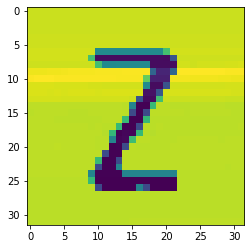

In [39]:
plt.imshow(img3)

In [40]:
base_dir = '/content/dataset/'
classes = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  print(img_path)
  images = glob.glob(img_path + '/*.png')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    try:
      shutil.move(t, os.path.join(base_dir, 'train', cl))
    except:
      pass

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    try:
      shutil.move(v, os.path.join(base_dir, 'val', cl))
    except:
      pass

/content/dataset/A
A: 9720 Images
/content/dataset/B
B: 1044 Images
/content/dataset/C
C: 10370 Images
/content/dataset/D
D: 9408 Images
/content/dataset/E
E: 11280 Images
/content/dataset/F
F: 8485 Images
/content/dataset/G
G: 9096 Images
/content/dataset/H
H: 9096 Images
/content/dataset/I
I: 17208 Images
/content/dataset/J
J: 15024 Images
/content/dataset/K
K: 10656 Images
/content/dataset/L
L: 12528 Images
/content/dataset/M
M: 6912 Images
/content/dataset/N
N: 8797 Images
/content/dataset/O
O: 8784 Images
/content/dataset/P
P: 10669 Images
/content/dataset/Q
Q: 8100 Images
/content/dataset/R
R: 10344 Images
/content/dataset/S
S: 11592 Images
/content/dataset/T
T: 11280 Images
/content/dataset/U
U: 9109 Images
/content/dataset/V
V: 9577 Images
/content/dataset/W
W: 636 Images
/content/dataset/X
X: 10656 Images
/content/dataset/Y
Y: 11280 Images
/content/dataset/Z
Z: 11592 Images


In [74]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [75]:
batch_size = 100
IMG_SHAPE = 64

In [ ]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_SHAPE = 224

In [76]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    zoom_range=0.5
                    )



train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                color_mode="grayscale",
                                                target_size=(32,32),
                                                class_mode='sparse'
                                                )

Found 202595 images belonging to 26 classes.


In [77]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.reshape(32,32))
    plt.tight_layout()
    plt.show()

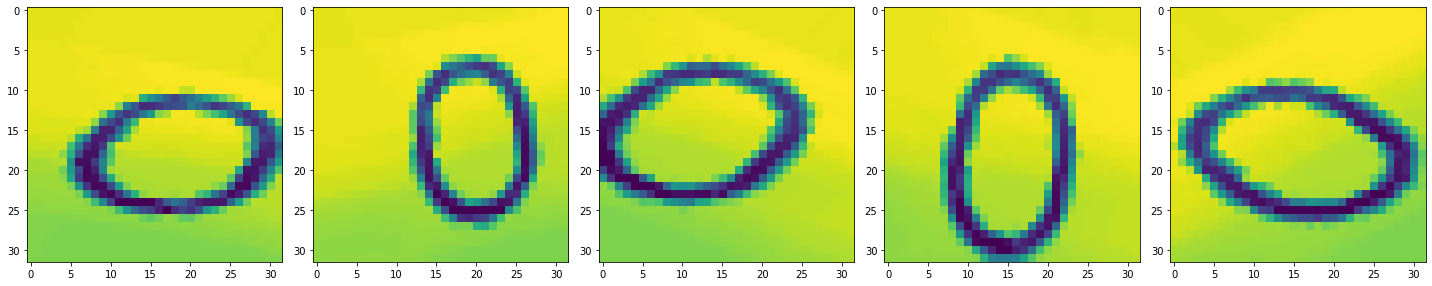

In [78]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [79]:
image_gen_val = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=45,
                      width_shift_range=.15,
                      height_shift_range=.15,
                      zoom_range=0.5
                                   )

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 color_mode="grayscale",
                                                 target_size=(32,32),
                                                 class_mode='sparse')

Found 50648 images belonging to 26 classes.


In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,3, padding='same', activation='relu', input_shape=(32,32, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(26, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 26)                106522    
Total params: 106,682
Trainable params: 106,682
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
epochs = 1
 
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

   1/2026 [..............................] - ETA: 1:57 - loss: 0.8500 - accuracy: 0.7700

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


2026/2026 [==============================] - 112s 55ms/step - loss: 0.8133 - accuracy: 0.7866 - val_loss: 0.8242 - val_accuracy: 0.7861


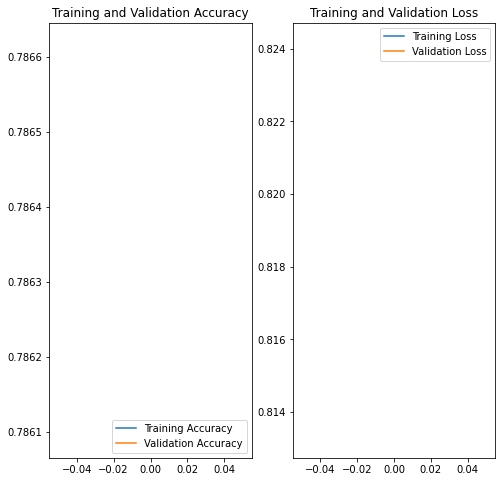

In [86]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,747 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../tesserac

[[22, 15, 64, 80], [78, 13, 128, 81], [139, 11, 181, 80], [201, 11, 254, 80]]


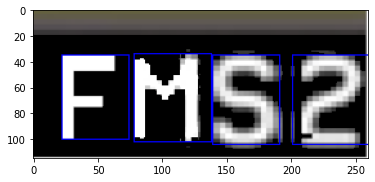

In [58]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
img = cv2.imread('done.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#median = cv2.medianBlur(img,5)
#print(pytesseract.image_to_string(img)) ...//printing image as a string
##...Detecting characters
#print(pytesseract.image_to_boxes(img))
hImg,wImg,_ = img.shape
boxes = pytesseract.image_to_boxes(img)
roilist=[]
for b in boxes.splitlines():
    b = b.split(' ')
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    roilist.append([x,y,w,h])
    cv2.rectangle(img,(x,hImg-y),(w+10,hImg-h),(0,0,255),1)
    #print(b)

print(roilist)
plt.imshow(img)

(1, 32, 32, 1)
V


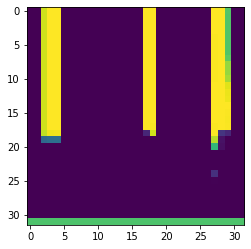

In [99]:
import numpy as np
import cv2
import time
img = cv2.imread('done.png',0)
x=roilist[1][0]
y=roilist[1][1]
w=roilist[1][2]
h=roilist[1][3]
img=img[x:x+h,y:y+w-4]

im=cv2.resize(img,(32,32))



plt.imshow(im)
batch = np.expand_dims(im,axis=0)
batch = np.expand_dims(batch,axis=3)
print(batch.shape) 





test=model.predict(batch)
predicted_ids=np.argmax(test)
if predicted_ids==[1]:
  print('A')
elif predicted_ids==[2]:
  print('B')
elif predicted_ids==[3]:
  print('C')
elif predicted_ids==[4]:
  print('D')
elif predicted_ids==[5]:
  print('E')
elif predicted_ids==[6]:
  print('F')
elif predicted_ids==[7]:
  print('G')
elif predicted_ids==[8]:
  print('H')
elif predicted_ids==[9]:
  print('I')
elif predicted_ids==[10]:
  print('J')
elif predicted_ids==[11]:
  print('K')
elif predicted_ids==[12]:
  print('L')
elif predicted_ids==[13]:
  print('M')
elif predicted_ids==[14]:
  print('N')
elif predicted_ids==[15]:
  print('O')
elif predicted_ids==[15]:
  print('P')
elif predicted_ids==[17]:
  print('Q')
elif predicted_ids==[18]:
  print('R')
elif predicted_ids==[19]:
  print('S')
elif predicted_ids==[20]:
  print('T')
elif predicted_ids==[21]:
  print('U')

elif predicted_ids==[22]:
  print('V')
elif predicted_ids==[23]:
  print('W')
elif predicted_ids==[24]:
  print('X')
elif predicted_ids==[25]:
  print('Y')
elif predicted_ids==[26]:
  print('Z')


In [98]:
import csv  
    
# field names  
fields = ['Name']  
    
# data rows of csv file  
rows = [ [classes[predicted_ids-1]]]  
    
# name of csv file  
filename = "records.csv"
    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    csvwriter.writerows(rows) 

In [76]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1614313616.h5


In [ ]:
!ls

1602237499.h5	   asl_alphabet_train  logo.png
asl_alphabet_test  datasets	       sample_data


In [ ]:
!zip -r model.zip {export_path_sm}

  adding: 1602146320/ (stored 0%)
  adding: 1602146320/assets/ (stored 0%)
  adding: 1602146320/saved_model.pb (deflated 89%)
  adding: 1602146320/variables/ (stored 0%)
  adding: 1602146320/variables/variables.index (deflated 65%)
  adding: 1602146320/variables/variables.data-00000-of-00001 (deflated 24%)


In [ ]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>